In [1]:
import healsparse as hsp
from astropy.table import Table
import matplotlib.pyplot as plt

# mask = hsp.HealSparseMap.read("/sps/lsst/users/namourou/web/clusters/DC2/bright_objects_masks/catalogs/bo_masks_3830.hs")
# mask = hsp.HealSparseMap.read("/sps/lsst/users/namourou/web/clusters/DC2/bright_objects_masks/catalogs/first_full_mask/bo_masks.hs")
mask = hsp.HealSparseMap.read(
    "/sps/lsst/users/namourou/web/clusters/DC2/bright_objects_masks/catalogs/full_dc2_masks_mag_i_truth_nanmean/bo_masks.hs"
)

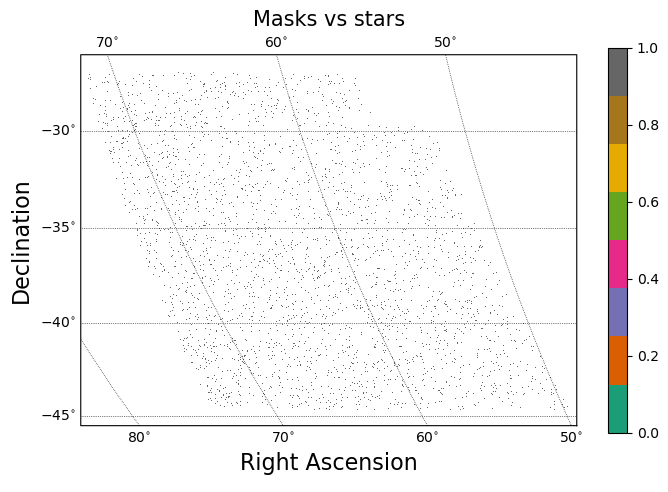

In [2]:
import skyproj

fig, ax = plt.subplots(figsize=(8, 5))
sp = skyproj.McBrydeSkyproj(ax=ax)
im, lon_raster, lat_raster, values_raster = sp.draw_hspmap(
    mask, vmin=0, vmax=1, lon_range=[48, 76], lat_range=[-45, -27], cmap="Dark2"
)
# plt.scatter(stars_dc2['ra'], stars_dc2['dec'],s=3,c='r', label = 'DC2 bright stars (mag_i<18)')
# sp.draw_inset_colorbar()
# for star in stars_dc2[(stars_dc2['ra']>60)&(stars_dc2['ra']<60.5)&(stars_dc2['dec']<-36)&(stars_dc2['dec']>-36.4)]:
#    sp.draw_polygon([star['ra']+0.0001,star['ra']-0.0001], [star['dec']+0.0001,star['dec']-0.0001],alpha=.7,facecolor = 'red', edgecolor='red')
plt.annotate(
    "Masks vs stars",
    xy=(0.5, 1.03),
    xycoords="axes fraction",
    xytext=(0, 10),
    textcoords="offset points",
    ha="center",
    va="bottom",
    fontsize=15,
)
plt.colorbar()
plt.show()

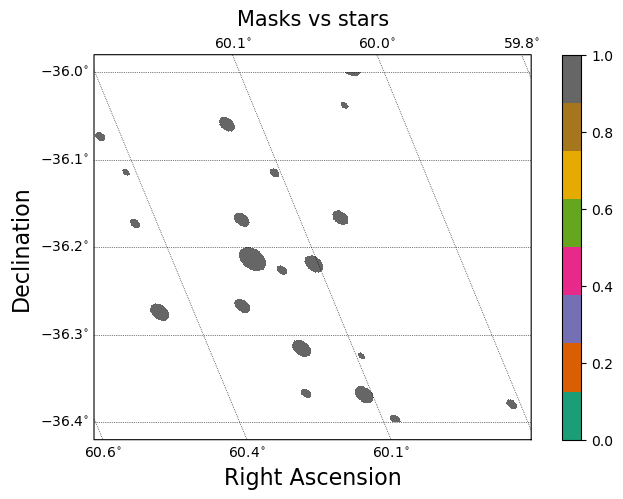

In [3]:
import skyproj

fig, ax = plt.subplots(figsize=(8, 5))
sp = skyproj.McBrydeSkyproj(ax=ax)
im, lon_raster, lat_raster, values_raster = sp.draw_hspmap(
    mask, vmin=0, vmax=1, lon_range=[60, 60.5], lat_range=[-36.4, -36], cmap="Dark2"
)
# plt.scatter(stars_dc2['ra'], stars_dc2['dec'],s=3,c='r', label = 'DC2 bright stars (mag_i<18)')
# sp.draw_inset_colorbar()
# for star in stars_dc2[(stars_dc2['ra']>60)&(stars_dc2['ra']<60.5)&(stars_dc2['dec']<-36)&(stars_dc2['dec']>-36.4)]:
#    sp.draw_polygon([star['ra']+0.0001,star['ra']-0.0001], [star['dec']+0.0001,star['dec']-0.0001],alpha=.7,facecolor = 'red', edgecolor='red')
plt.annotate(
    "Masks vs stars",
    xy=(0.5, 1.03),
    xycoords="axes fraction",
    xytext=(0, 10),
    textcoords="offset points",
    ha="center",
    va="bottom",
    fontsize=15,
)
plt.colorbar()
plt.show()

In [4]:
import GCRCatalogs
from GCRCatalogs.helpers.tract_catalogs import tract_filter
from GCRCatalogs import GCRQuery

catalog = GCRCatalogs.load_catalog("dc2_object_run2.2i_dr6_v2_with_addons_v2")
dc2 = Table(
    catalog.get_quantities(
        ["ra", "dec", "extendedness", "mag_i_cModel", "mag_i_truth", "clean"],
        native_filters=[tract_filter(3830)],
    )
)

/sps/lsst/users/namourou/conda_envs/conda_clone_021023/desc_v0/lib/python3.10/site-packages/GCRCatalogs/parquet.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col: arr.values for col, arr in df.iteritems()}
/sps/lsst/users/namourou/conda_envs/conda_clone_021023/desc_v0/lib/python3.10/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky
/sps/lsst/users/namourou/conda_envs/conda_clone_021023/desc_v0/lib/python3.10/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky


In [5]:
galaxy_sample = dc2[
    (dc2["extendedness"] == 1)
    & (dc2["mag_i_cModel"] < 25.3)
    & (dc2["mag_i_cModel"] > 17)
    & (dc2["clean"] == True)
]
star_sample = dc2[
    (dc2["extendedness"] != 1) & (dc2["mag_i_truth"] < 16) & (dc2["clean"] == False)
]

In [6]:
galaxy_sample_r = galaxy_sample[
    (galaxy_sample["ra"] >= 60.16)
    & (galaxy_sample["ra"] <= 60.45)
    & (galaxy_sample["dec"] <= -36.11)
    & (galaxy_sample["dec"] >= -36.34)
]
star_sample_r = star_sample[
    (star_sample["ra"] >= 60.16)
    & (star_sample["ra"] <= 60.45)
    & (star_sample["dec"] <= -36.11)
    & (star_sample["dec"] >= -36.34)
]

In [7]:
bright_galaxies = dc2[
    (dc2["extendedness"] == 1) & (dc2["mag_i_cModel"] < 16) & (dc2["clean"] == True)
]
bright_galaxies_r = bright_galaxies[
    (bright_galaxies["ra"] >= 60.16)
    & (bright_galaxies["ra"] <= 60.45)
    & (bright_galaxies["dec"] <= -36.11)
    & (bright_galaxies["dec"] >= -36.34)
]

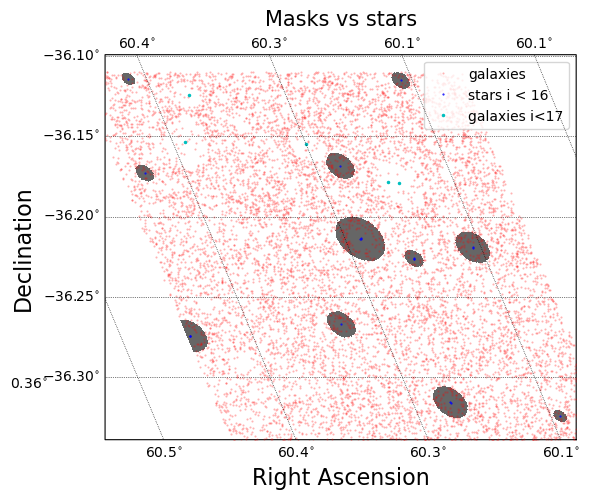

In [10]:
import skyproj

fig, ax = plt.subplots(figsize=(8, 5))
sp = skyproj.McBrydeSkyproj(ax=ax)
im, lon_raster, lat_raster, values_raster = sp.draw_hspmap(
    mask,
    vmin=0,
    vmax=1,
    lon_range=[60.45, 60.16],
    lat_range=[-36.34, -36.11],
    cmap="Dark2",
)
sp.plot(
    galaxy_sample_r["ra"],
    galaxy_sample_r["dec"],
    "r.",
    markersize=1,
    alpha=0.3,
    label="galaxies",
)
sp.plot(
    star_sample_r["ra"],
    star_sample_r["dec"],
    "b.",
    markersize=1,
    alpha=1,
    label="stars i < 16",
)
# sp.plot(star_sample_r[star_sample_r["mag_i_truth"]<10]["ra"], star_sample_r[star_sample_r["mag_i_truth"]<10]["dec"], 'g.', markersize =3, label = "stars i<10")
sp.plot(
    bright_galaxies_r["ra"],
    bright_galaxies_r["dec"],
    "c.",
    markersize=3,
    label="galaxies i<17",
)
plt.annotate(
    "Masks vs stars",
    xy=(0.5, 1.03),
    xycoords="axes fraction",
    xytext=(0, 10),
    textcoords="offset points",
    ha="center",
    va="bottom",
    fontsize=15,
)
plt.legend(loc="upper right")
# plt.colorbar()
plt.show()

In [11]:
star_sample_r

dec,ra,mag_i_cModel,extendedness,clean,mag_i_truth
float64,float64,float64,float64,bool,float32
-36.27424456201619,60.44759076086012,nan,nan,False,11.541852
-36.27450139162011,60.447755577375666,nan,nan,False,11.541852
-36.274143290880204,60.44706909324084,nan,nan,False,11.541852
-36.32421598791612,60.192904231244775,nan,nan,False,14.319262
-36.3158816839796,60.27149368576876,nan,nan,False,11.4672365
-36.31542578838101,60.27172367992699,nan,nan,False,11.4672365
-36.267098356972895,60.32949587970447,nan,nan,False,12.697731
-36.22616919495566,60.25378524399388,nan,nan,False,13.056302
-36.225996024537785,60.254057475689045,nan,nan,False,13.056302


In [9]:
bright_galaxies_r

dec,ra,mag_i_cModel,extendedness,clean,mag_i_truth
float64,float64,float64,float64,bool,float32
-36.178950509293095,60.24211788921433,13.453055668982852,1.0,True,13.235193
-36.17878716973885,60.250150778011246,15.654102462395294,1.0,True,15.824316
-36.153807496916684,60.39099468390851,15.156800578168344,1.0,True,13.556377
-36.154879247440135,60.29967323836165,14.929407345820977,1.0,True,14.6072855
-36.124348962258836,60.37306724016226,15.60787708964518,1.0,True,15.31616
